<h1>Prompt Image Matching Process</h1>

In [1]:
import pandas as pd

tagged_sample_df = pd.read_csv('sample_dataset_tagged_2025_02_13_23_28_26.csv')
tagged_sample_df.head()

,file_name,tagging_vitgpt2
0,4afccb317564489cab6f7d70985fdba0.jpg,a tree with a bunch of white flowers in it
1,dd696f3d76e84050a5050d9c80a0ec16.jpg,"a sign that says ""no parking"" on a pole"
2,e25114803e2e4b69bf1c0ec3eef96142.jpg,a woman in a blue shirt and a blue tie
3,ce77214244834cf38e9be5edec8c3eea.jpg,a woman is putting on makeup on a woman
4,e38172f9991448fe84ff8b09a4fbf51a.jpg,a young boy sitting on the grass eating someth...


<h2>Labelled Images</h2>

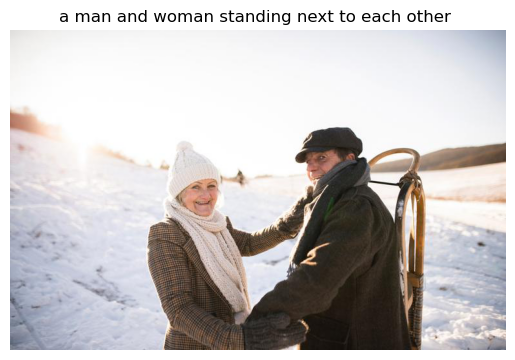

In [29]:
id = 28
image_name = tagged_sample_df.iloc[id].file_name
image_tag = tagged_sample_df.iloc[id].tagging_vitgpt2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_filename = '../sample_images/'+image_name
#image_filename = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
img = mpimg.imread(image_filename)
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.title(image_tag)
plt.show()

<h2>Text Matching Algorithm</h2>

In [32]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

n_feats = 200
tfidf = TfidfVectorizer() #Term Frequency Matrix  max_features=n_feats
X = tfidf.fit_transform(tagged_sample_df['tagging_vitgpt2']).toarray()
X.shape #get feature matrix size

(500, 493)

In [33]:
from sklearn.metrics.pairwise import cosine_similarity 
import numpy as np
#image_recommender
def image_recommender(tagged_sample_df_,tagger,tf_idf,X_matrix,text,thr_=0.35,top_n=10):
    X_text = tf_idf.transform([text])
    cosine_sim_matrix = cosine_similarity(X_text,X)
    cosine_sim_matrix = cosine_sim_matrix[0]
    sort_ids = np.argsort(cosine_sim_matrix)#sort 
    sort_ids = sort_ids[::-1]#descendingly
    features_df_rec = tagged_sample_df_.loc[sort_ids,['file_name',tagger]]
    features_df_rec['sim'] = cosine_sim_matrix[sort_ids]
    output_df_ = features_df_rec[features_df_rec['sim'] > thr_]
    output_df = output_df_.iloc[0:top_n,:]
    return output_df 

In [84]:
text = 'happy people'
tagger = 'tagging_vitgpt2'
top_k = 10
output_df = image_recommender(tagged_sample_df,tagger,tfidf,
                               X,text,thr_=0.00,top_n=top_k)
output_df

,file_name,tagging_vitgpt2,sim
101,569e7907dc1747ec9cf8ca451d2b44d2.jpg,a crowd of people standing around a group of p...,0.711069
288,5a09239c52884a0b9093941c331c05e6.jpg,people sitting at a table,0.694488
243,4c00e18f23b84451bbd18911f88aab12.jpg,people are gathered around a picnic table,0.440202


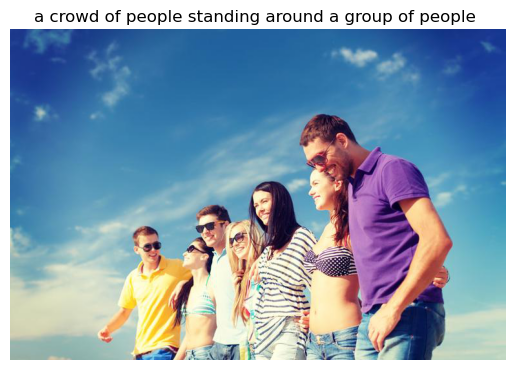

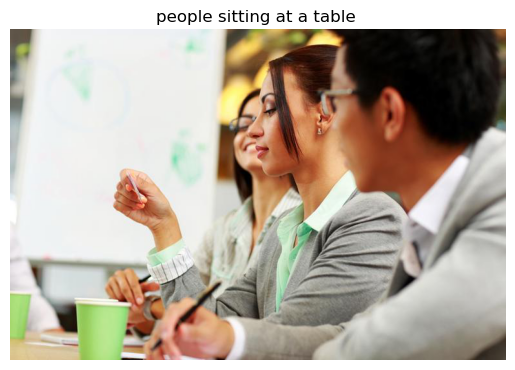

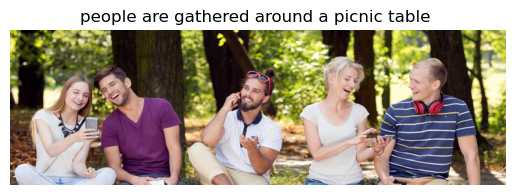

In [86]:
for i in range(len(output_df)):
    image_name = output_df.iloc[i].file_name
    image_tag =  output_df.iloc[i].tagging_vitgpt2
    image_filename = '../sample_images/'+image_name
    #image_filename = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
    img = mpimg.imread(image_filename)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.title(image_tag)
    plt.show()

<h2>Storing the solution</h2>

In [88]:
import pickle

with open('image_recommender_model_vitgpt2_tidf_files.pkl', 'wb') as f:
    pickle.dump(image_recommender, f)
    pickle.dump(tagged_sample_df, f)
    pickle.dump(tfidf, f)
    pickle.dump(X, f)

In [90]:
with open('image_recommender_model_vitgpt2_tidf_files.pkl', 'rb') as f:
    system_image_recommender = pickle.load(f)
    tagged_sample_df = pickle.load(f)
    tfidf = pickle.load(f)
    X_matrix = pickle.load(f)
    
text = 'man'
tagger = 'tagging_vitgpt2'
output_df = system_image_recommender(tagged_sample_df,tagger,tfidf,
                              X_matrix,text,thr_=0.0,top_n=10)
output_df

,file_name,tagging_vitgpt2,sim
280,5623dc1189b04c09a5e066f237a3dff1.jpg,a man in a blue shirt and a man in a white shirt,0.459740
444,029baa4502914e898d79754a15401e0a.jpg,a woman sitting on a couch with a man,0.401310
432,46212dd4b5db48f98df40f99af02a95f.jpg,a woman and a man standing on a field,0.386646
35,ccb476d7699642c9a72f06ee1e0118b9.jpg,a woman and a man sitting at a table,0.385135
122,6898291a921e4aa489524cab159408b6.jpg,a man is holding a tie on a table,0.366545
183,83b5355ed7cc4f35afad223bef41a41e.jpg,a man and woman are sitting at a table,0.334459
157,246cf42387db4207961a7bb07b89089b.jpg,a woman and a man are sitting at a table,0.334459
138,405df02ca8b149aaab6760f2f1980c30.jpg,a man and woman are holding a baby,0.328414
192,4549c14acc02462cb9d63a1ea8d8bea1.jpg,a man sitting on a couch holding a book,0.317136
428,db242d0334024a279733ff63aa3aa1b3.jpg,a woman and a man are sitting on a chair,0.316374
